In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mb

In [9]:
df=pd.read_csv('polep.csv')

In [10]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package in lakhs per annum')

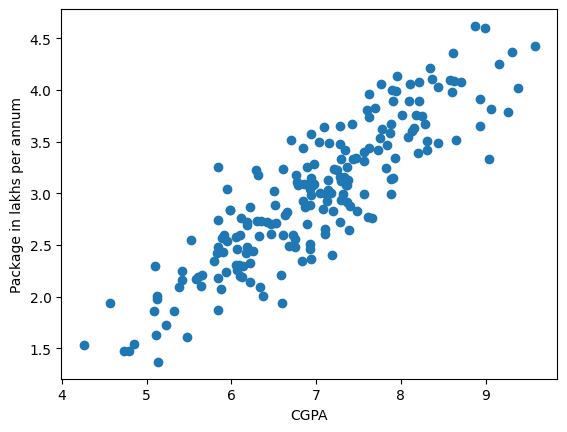

In [14]:
mb.scatter(df['cgpa'],df['package'])
mb.xlabel('CGPA')

mb.ylabel('Package in lakhs per annum')

first step to train model is to separate input and output

In [15]:
x=df.iloc[: ,0:1]

In [16]:
print(x)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]


In [17]:
y=df.iloc[: ,1:]

In [18]:
print(y.head())

   package
0     3.26
1     1.98
2     3.25
3     3.67
4     3.57


In [21]:
from sklearn.model_selection import train_test_split as train


In [24]:
x_train,x_test,y_train,y_test=train(x,y,test_size=0.09)
print(x_train)

     cgpa
21   6.85
95   6.63
198  7.63
165  8.21
140  7.91
..    ...
87   8.09
193  4.57
142  6.93
97   5.98
80   7.63

[182 rows x 1 columns]


## now we train model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
li=LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

In [34]:
li.predict(x_test.iloc[5].values.reshape(1,1))

C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.01670503]])

In [31]:
print(x_test,':',y_test)

     cgpa
107  6.33
24   6.53
25   7.28
122  5.12
57   6.60
120  5.23
18   6.94
7    6.75
45   7.87
127  6.78
22   6.14
195  6.93
41   6.89
191  7.28
11   6.61
72   7.78
114  5.84
151  6.12 :      package
107     2.59
24      2.71
25      3.65
122     2.01
57      1.94
120     1.73
18      2.98
7       2.48
45      3.58
127     3.11
22      2.30
195     2.46
41      2.70
191     3.48
11      2.60
72      3.62
114     1.87
151     2.76


Text(0, 0.5, 'Package in lakhs per annum')

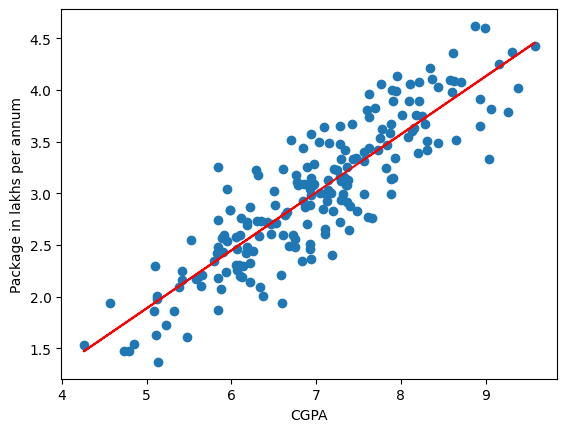

In [38]:
mb.scatter(df['cgpa'],df['package'])
mb.plot(x_train,li.predict(x_train),color='red')
mb.xlabel('CGPA')

mb.ylabel('Package in lakhs per annum')

In [39]:
m=li.coef_

In [40]:
print(m)

[[0.56108943]]


In [42]:
li.intercept_

array([-0.91779271])

## creating own module for model trainning

In [17]:
class mymodel:
    def __init__(self):
        self.m=None
        self.b=None

    def myfit(self,x_train,y_train):
        num=0
        den=0
        for i in range(x_train.shape[0]):
            num=num+((x_train[i]-x_train.mean())*(y_train[i]-y_train.mean()))
            den=den+(x_train[i]-x_train.mean())**2
        self.m=num/den
        self.b=y_train.mean()-self.m*x_train.mean()
        print(self.m)
        print(self.b)
    def mypredict(self,x_test):
        return self.m*x_test+self.b

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('polep.csv')

In [2]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [8]:
x=df.iloc[: ,0:1].values

In [9]:
y=df.iloc[:, 1:2].values

In [10]:
y.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [11]:
print(x)

[[6.89]
 [5.12]
 [7.82]
 [7.42]
 [6.94]
 [7.89]
 [6.73]
 [6.75]
 [6.09]
 [8.31]
 [5.32]
 [6.61]
 [8.94]
 [6.93]
 [7.73]
 [7.25]
 [6.84]
 [5.38]
 [6.94]
 [7.48]
 [7.28]
 [6.85]
 [6.14]
 [6.19]
 [6.53]
 [7.28]
 [8.31]
 [5.42]
 [5.94]
 [7.15]
 [7.36]
 [8.1 ]
 [6.96]
 [6.35]
 [7.34]
 [6.87]
 [5.99]
 [5.9 ]
 [8.62]
 [7.43]
 [9.38]
 [6.89]
 [5.95]
 [7.66]
 [5.09]
 [7.87]
 [6.07]
 [5.84]
 [8.63]
 [8.87]
 [9.58]
 [9.26]
 [8.37]
 [6.47]
 [6.86]
 [8.2 ]
 [5.84]
 [6.6 ]
 [6.92]
 [7.56]
 [5.61]
 [5.48]
 [6.34]
 [9.16]
 [7.36]
 [7.6 ]
 [5.11]
 [6.51]
 [7.56]
 [7.3 ]
 [5.79]
 [7.47]
 [7.78]
 [8.44]
 [6.85]
 [6.97]
 [6.94]
 [8.99]
 [6.59]
 [7.18]
 [7.63]
 [6.1 ]
 [5.58]
 [8.44]
 [4.26]
 [4.79]
 [7.61]
 [8.09]
 [4.73]
 [6.42]
 [7.11]
 [6.22]
 [7.9 ]
 [6.79]
 [5.83]
 [6.63]
 [7.11]
 [5.98]
 [7.69]
 [6.61]
 [7.95]
 [6.71]
 [5.13]
 [7.05]
 [7.62]
 [6.66]
 [6.13]
 [6.33]
 [7.76]
 [7.77]
 [8.18]
 [5.42]
 [8.58]
 [6.94]
 [5.84]
 [8.35]
 [9.04]
 [7.12]
 [7.4 ]
 [7.39]
 [5.23]
 [6.5 ]
 [5.12]
 [5.1 ]
 [6.06]


In [12]:
from sklearn.model_selection import train_test_split as tt
x_train,x_test,y_train,y_test= tt(x,y,test_size=0.2,random_state=2)

In [18]:
lr=mymodel()
lr.myfit(x_train,y_train)

[0.55795197]
[-0.89611192]


In [20]:
lr.mypredict(10.0)

array([4.68340781])